In [28]:
import pandas as pd
import json
import numpy as np
from src.generation_utils import SUMMARY_FAILED_GENERATION


def read_logs(path):
    with open(
        path,
        "r"
    ) as f:
        iteration_logs = json.load(f)

    data = []
    edits_by_sum_id = {}
    for iteration in iteration_logs:
        for sum_id, sum_data in iteration["summary"].items():
            if "edit_stats" in sum_data:
                if sum_id not in edits_by_sum_id:
                    edits_by_sum_id[sum_id] = {}
                edits_by_sum_id[sum_id]["token"] = sum_data["edit_stats"]["edit_distance_token"]
                edits_by_sum_id[sum_id]["rouge1"] = sum_data["edit_stats"]["rouge1"]
                edits_by_sum_id[sum_id]["rouge2"] = sum_data["edit_stats"]["rouge2"]
                edits_by_sum_id[sum_id]["rougeL"] = sum_data["edit_stats"]["rougeL"]

        result_obj = {
            "iteration": iteration["iteration"],
            "summary_factual": iteration["factuality_summary"]["factual"],
            "summary_non_factual": iteration["factuality_summary"]["non_factual"],
            "summary_unknown": iteration["factuality_summary"]["unknown"],
            "summary_failed": iteration["factuality_summary"]["failed"],
            "mean_edit_distance_token": np.mean(
                [x["token"] for x in edits_by_sum_id.values()]
            ),
            "mean_edit_distance_rouge1": np.mean(
                [x["rouge1"] for x in edits_by_sum_id.values()]
            ),
            "mean_edit_distance_rouge2": np.mean(
                [x["rouge2"] for x in edits_by_sum_id.values()]
            ),
            "mean_edit_distance_rougeL": np.mean(
                [x["rougeL"] for x in edits_by_sum_id.values()]
            )
        }
        data.append(result_obj)
    
    return pd.DataFrame(data).set_index("iteration"), iteration_logs, edits_by_sum_id

# dataset = "pegasus"
dataset = "bart"
test_size = 100
num_beams = 4
beam_suffix = "" if num_beams == 4 else f"-beams-{num_beams}"

df_clf, logs_clf, edits_clf = read_logs(
    f"results/iteration-changes/{dataset}-test-extrinsic-{test_size}-classifier-knnv1{beam_suffix}.json"
)
df_oracle, logs_oracle, edits_oracle = read_logs(
    f"results/iteration-changes/{dataset}-test-extrinsic-{test_size}-oracle{beam_suffix}.json"
)

df_oracle

/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



,summary_factual,summary_non_factual,summary_unknown,summary_failed,mean_edit_distance_token,mean_edit_distance_rouge1,mean_edit_distance_rouge2,mean_edit_distance_rougeL
iteration,,,,,,,,
0,0.41,0.59,0.00,0,NaN,NaN,NaN,NaN
1,0.52,0.48,0.00,1,6.529412,0.788673,0.672538,0.763849
2,0.60,0.40,0.00,3,7.431373,0.772834,0.643134,0.737901
3,0.64,0.36,0.00,7,7.980392,0.765178,0.639092,0.724622
4,0.65,0.35,0.00,7,7.823529,0.770551,0.643548,0.727479
5,0.66,0.32,0.02,12,8.000000,0.763456,0.633431,0.718764
6,0.66,0.31,0.03,13,8.137255,0.758827,0.628603,0.714009
7,0.66,0.30,0.04,13,8.156863,0.757936,0.628603,0.714009


In [15]:
df_clf

,summary_factual,summary_non_factual,summary_unknown,summary_failed,mean_edit_distance_token,mean_edit_distance_rouge1,mean_edit_distance_rouge2,mean_edit_distance_rougeL
iteration,,,,,,,,
0,0.600000,0.400000,0.000000,0,NaN,NaN,NaN,NaN
1,0.613333,0.280000,0.106667,1,7.441176,0.756147,0.645870,0.734820
2,0.640000,0.293333,0.066667,2,7.235294,0.753823,0.643662,0.727939
3,0.626667,0.320000,0.053333,2,7.941176,0.737724,0.614117,0.707073
4,0.626667,0.373333,0.000000,8,8.205882,0.731698,0.606598,0.700910
5,0.653333,0.346667,0.000000,9,7.882353,0.744102,0.621919,0.713451
6,0.653333,0.346667,0.000000,9,7.617647,0.748161,0.624573,0.721744
7,0.653333,0.333333,0.013333,9,7.852941,0.745783,0.621919,0.715132
8,0.653333,0.346667,0.000000,9,7.852941,0.745783,0.621919,0.715132


Text(0.5, 0, 'Word edit distance')

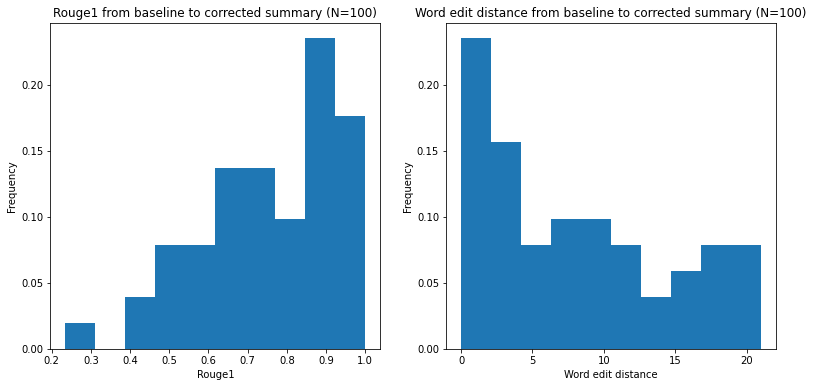

In [60]:
import matplotlib.pyplot as plt
rouge_changes = []

for x in edits_oracle.values():
    rouge_changes.append(x["rouge1"])

fig, axs = plt.subplots(1, 2, figsize=(13, 6))
axs[0].hist(
    rouge_changes, 
    weights=np.ones_like(rouge_changes)/float(len(rouge_changes))
)
axs[0].set_title("Rouge1 from baseline to corrected summary (N=100)")
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Rouge1")

edit_distances = []
for x in edits_oracle.values():
    edit_distances.append(x["token"])

axs[1].hist(
    edit_distances, 
    weights=np.ones_like(edit_distances)/float(len(edit_distances))
)
axs[1].set_title("Word edit distance from baseline to corrected summary (N=100)")
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Word edit distance")

Text(0.5, 1.0, 'Token edit distance from baseline to corrected summary (N=100)')

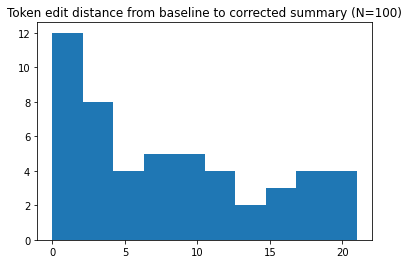

In [36]:
import matplotlib.pyplot as plt
edit_distances = []

for x in edits_oracle.values():
    edit_distances.append(x["token"])

plt.hist(edit_distances)
plt.title("Token edit distance from baseline to corrected summary (N=100)")

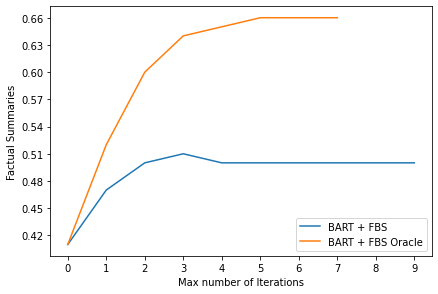

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

# Be sure to only pick integer tick locations.
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.plot(
    df_clf.index,
    df_clf.summary_factual,
    label="BART + FBS"
)
ax.plot(
    df_oracle.index,
    df_oracle.summary_factual,
    label="BART + FBS Oracle"
)
ax.margins(0.05)
ax.axis('tight')
fig.tight_layout()
plt.ylabel("Factual Summaries")
plt.xlabel("Max number of Iterations")
plt.legend()

# TODO change to histogram to show how many iterations it takes on average

In [5]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Factual", "Non-Factual", "B1", "B2", "C1", "C2"],
      color = "green"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Entity Changes", font_size=10)
fig.show()

In [2]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]
print(data)
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

{'data': [{'type': 'sankey', 'domain': {'x': [0, 1], 'y': [0, 1]}, 'orientation': 'h', 'valueformat': '.0f', 'valuesuffix': 'TWh', 'node': {'pad': 15, 'thickness': 15, 'line': {'color': 'black', 'width': 0.5}, 'label': ["Agricultural 'waste'", 'Bio-conversion', 'Liquid', 'Losses', 'Solid', 'Gas', 'Biofuel imports', 'Biomass imports', 'Coal imports', 'Coal', 'Coal reserves', 'District heating', 'Industry', 'Heating and cooling - commercial', 'Heating and cooling - homes', 'Electricity grid', 'Over generation / exports', 'H2 conversion', 'Road transport', 'Agriculture', 'Rail transport', 'Lighting & appliances - commercial', 'Lighting & appliances - homes', 'Gas imports', 'Ngas', 'Gas reserves', 'Thermal generation', 'Geothermal', 'H2', 'Hydro', 'International shipping', 'Domestic aviation', 'International aviation', 'National navigation', 'Marine algae', 'Nuclear', 'Oil imports', 'Oil', 'Oil reserves', 'Other waste', 'Pumped heat', 'Solar PV', 'Solar Thermal', 'Solar', 'Tidal', 'UK land